# Lecture 14 - Artificial Neural Networks with Keras-TensorFlow

[![View notebook on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/avakanski/Fall-2025-Applied-Data-Science-with-Python/blob/main/docs/Lectures/Theme_3-Model_Engineering/Lecture_14-ANNs/Lecture_14-ANNs.ipynb)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/avakanski/Fall-2025-Applied-Data-Science-with-Python/blob/main/docs/Lectures/Theme_3-Model_Engineering/Lecture_14-ANNs/Lecture_14-ANNs.ipynb) 

<a id='top'></a>

- [14.1 Introduction to Artificial Neural Networks](#14.1-introduction-to-artificial-neural-networks)
    - [14.1.1 Elements of ANNs](#14.1.1-elements-of-anns)
    - [14.1.2 Common Activation Functions](#14.1.2-common-activation-functions)
    - [14.1.3 Training ANNs](#14.1.3-training-anns)
    - [14.1.4 Types of ANN Architectures](#14.1.4-types-of-ann-architectures)
    - [14.1.5 Fully-connected NNs](#14.1.5-fully-connected-nns)
- [14.2 Classification with ANNs](#14.2-classification-with-anns)
    - [14.2.1 Binary Classification](#14.2.1-binary-classification)
    - [14.2.2 Multiclass Classification](#14.2.2-multiclass-classification)
- [14.3 Regression with ANNs](#14.3-regression-with-anns)
- [14.4 Saving and Loading Models in Keras](#14.4-saving-and-loading-models-in-keras)
- [Appendix](#appendix)
- [References](#references)

## 14.1 Introduction to Artificial Neural Networks <a id="14.1-introduction-to-artificial-neural-networks"/>

**Artificial Neural Networks (ANNs)** are a class of machine learning algorithms that employ a network of connected computational units for information processing. ANNs are organized in layers, where each layer is made up of multiple interconnected nodes. The concept of ANNs is motivated by biological neural networks, and the development of ANNs is the result of an attempt to replicate the workings of the human brain. Hence, the nodes (i.e., computational units) in ANNs are commonly referred to as **neurons**. 

A simple ANN is depicted in the following figure. The main layers in the ANN are:

* **Input layer**, takes the input data in numerical format, where inputs to ANNs can be tabular data, images, texts, audio, etc. 
* **Hidden layer**, connects the input and the output layers. The neurons in the hidden layer process the input data and extract relevant patterns in the data.
* **Output layer**, is the output of the network, which can be a continuous numeric value as in regression problems, or discrete class values as in classification problems. 

<img src="images/Neuralnetwork.png" width="350">

*Figure: Simple ANN with one hidden layer. Figure source: Wikipedia.*

In general, ANNs can have multiple input layers, multiple hidden layers, and multiple output layers. 

ANNs having multiple hidden layers are commonly referred to as **Deep Neural Networks (DNNs)**. Applying DNNs for solving a learning task is referred to as **Deep Learning (DL)**.

Most current ANNs that are implemented for solving real-world tasks have multiple hidden layers. The number of hidden layers depends on the specific task, and typically ranges from 10 to 100+. For solving complex tasks, ANNs with hundreds of hidden layers are used. Modern LLMs typically have several hundreds of hidden layers, and can have over one trillion connections between the computational nodes. 

### 14.1.1 Elements of ANNs <a id="14.1.1-elements-of-anns"/>

The values of the connections between the neurons in ANNs are learned during a training phase. By using a training dataset consisting of input features and target/output values (e.g., class labels in classification tasks), the values of the connections are updated with a goal of correctly predicting the outputs for given inputs. 

The following figure depicts the operation of a single neuron in an ANN. The neuron is connected to a set of inputs $x_1, x_2, ..., x_m$ and weights $w_1, w_2, ..., w_m$. Each neuron calculates the sum of the products of the inputs and the weights plus a bias value, i.e., $v = x_1 \cdot w_1 + x_2 \cdot w_2 + ... + x_m \cdot w_m + b$. The obtained value $v$ is then passed through an activation function and the output $y = \varphi(v)$ is transferred to the next layer in the network. 

The **weights** and **biases** in an ANN are called **network parameters**. And very often the term *weights* is used to refer to both weights and biases as network parameters.

<img src="images/neuron.png" width="450">

*Figure: Artificial Neuron.*

### 14.1.2 Common Activation Functions <a id="14.1.2-common-activation-functions"/>

**Activation functions** are applied to each neuron in ANNs to introduce non-linearities into the outputs of the neurons. Without non-linear activation functions, ANNs will simply learn linear mappings between the inputs and outputs. Calculating non-linear mappings between inputs and outputs gives ANNs the capability to learn complex tasks. 

The most common activation functions in ANNs are:

- **Sigmoid** activation function (also known as logistic activation function): For a real-valued input, it outputs a value between 0 and 1. Sigmoid activation is used in the output layer for binary classification problems. 
- **Tanh** activation function (tangent hyperbolic activation function): It is similar to the sigmoid activation function, but it outputs a value between -1 and 1. Tanh is rarely used in modern ANNs. 
- **ReLU (Rectified Linear Unit)** activation function: It outputs the input value if it is positive, and it outputs 0 if the input value is negative. In other words, this activation function just penalizes the negative inputs. ReLU is among the most commonly used activation functions in the hidden layers of modern ANNs. 
- **Leaky ReLU (Rectified Linear Unit)** activation function: It is a modification of ReLU, where instead of outputting 0 for negative values, Leaky ReLU has a small negative slope. Some networks use Leaky ReLU instead of ReLU.
- **Softmax** activation function: It is an extension of the sigmoid activation function for multiclass classification tasks, and it is used in the output layer for multiclass classification problems.

There are also several other modifications of ReLU activations, including GeLU (Gaussian error Linear Unit), SeLU (Scaled exponential Linear Unit), SiLU (Sigmoid Linear Unit), SwiGLU (Switch-Gated Linear Unit), etc. We will study those activation functions in subsequent lectures on Transformer Networks and LLMs. Overall, ReLU is one of the most used activation functions, although modern LLMs and multimodal models use GeLU, SiLU, and SwiGLU. 

<img src="images/activation_functions.jpg" width="750">

*Figure: Activation functions in ANNs.* 
*Figure source:* [link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9841357/)

### 14.1.3 Training ANNs <a id="14.1.3-training-anns"/>

ANNs are trained by iteratively updating the network parameters (weights and biases) to minimize the difference between the network predictions and target values.

Each iteration in the training phase includes the following 4 steps:

1. Forward pass (forward propagation)
2. Loss calculation 
3. Error backpropagation (backward pass)
4. Model parameters update

**Forward propagation** is also known as **forward pass**, because the input data is passed through all hidden layers of the neural network toward the output layer to obtain the network predictions. For instance, if the input is an image, the input data consist of the intensities of all image pixels; the data are fed to the network and are transformed through the layers of the network; for classification problems, the output is a vector of predicted class probabilities for that image. 

**Loss calculation** is the second step, i.e., the loss of the network is calculated as a difference between the network outputs (predictions of the image class) and the target labels (also referred to as ground-truth labels) for all images in the dataset. Common loss function for classification tasks is *crossentropy loss*, calculated as $-\sum{y\cdot log(\hat{y})}$, where $y$ is the ground-truth label and $\hat{y}$ is the network prediction. The sum sign $\sum$ indicates that the loss is calculated as a summation for all images in the dataset. For regression tasks commonly used loss functions include *mean-squared error* (calculated as $\sum{(y- \hat{y})^2}$) and *mean-absolute error* (calculated as $\sum{|y- \hat{y}|}$) between the network predictions and target ground-truth values. 

**Error backpropagation** is also called **backward pass** or **backward propagation** (where the term backpropagation is short for backward propagation). In this step, the predicted outputs are traversed back through the network, from the last (output) layer backward toward the first (input) layer. During the backward step, the gradients of the loss with respect to the model parameters $\nabla\mathcal{L}(𝜃)$ are calculated. If you recall from calculus, **gradient** is the vector of partial derivatives of a function, or for a loss function $\mathcal{L}$ and network parameters $𝜃$, the gradient is the vector $\nabla\mathcal{L} = [\partial\mathcal{L}/\partial𝜃_i]$. The gradient vector quantifies the impact of changing the network parameters on the predicted outputs. Automatic calculation of the gradients (automatic differentiation) is available in all current deep learning libraries, which significantly simplifies the implementation of deep learning algorithms. 

**Model parameters update** (weight update in the figure below) is the last step in which new values for the model parameters are calculated and updated, using an optimization algorithm. Modern ANNs use variants of the **Gradient Descent** optimization algorithm for updating model parameters.

<img src="images/training_ANN.png" width="650">

*Figure: Steps in training ANNs.*

A simple depiction of the ***Gradient Descent*** algorithm is shown in the next figure. The blue curve is a loss function $\mathcal{L}$, and the gradient of the loss function $\nabla\mathcal{L}$ gives the slope of the function. By updating the parameters in the opposite direction of the gradient of the loss $\nabla\mathcal{L}$, the algorithm finds parameters $𝜃$ for which the loss $\mathcal{L}$ has a minimal value. A small loss value means there is a small difference between the model predictions and the ground-truth values.

<img src="images/gradient_descent.png" width="850">

*Figure: Steps in training ANNs.*

Almost all modern neural networks are trained by applying a modified version of the Gradient Descent algorithm. Examples of such advanced Gradient Descent algorithms include Adam, SGD (Stochastic Gradient Descent), RMSprop, Adagrad, Nadam, and others. Deep learning libraries typically refer to the used algorithms for minimizing the loss of the model as **optimizers**.

Unlike the model training phase which includes forward pass, loss calculation, backward pass, and parameters update, the **prediction phase** (also known as **inference**) requires only a forward pass through the model. In the figure, during inference an image instance is passed to the model, and the model outputs a prediction for the class of the instance. 

<img src="images/inference.png" width="550">

*Figure: Training vs inference.* Source: [3].

### 14.1.4 Types of ANN Architectures <a id="14.1.4-types-of-ann-architectures"/>

The main types of ANN architectures are:

- **Fully-connected neural networks (FCNNs)** (a.k.a. densely-connected neural networks, dense networks, or multi-layer perceptrons)
- **Convolutional neural networks (CNNs)**
- **Recurrent neural networks (RNNs)**
- **Transformer neural networks (TNNs)**
- **Graph neural networks (GNNs)**

In this lecture we will study fully-connected NNs, and in the following lectures we will explore the other ANN architectures.

### 14.1.5 Fully-connected NNs <a id="14.1.5-fully-connected-nns"/>

**Fully-connected NNs** are made of layers in which the neurons of any layer are connected to all other neurons of the preceding and succeeding layers. They are also called **Densely-connected NNs**, **Dense NNs**, as well as they are often referred to as **Multi-Layer Perceptrons (MLPs)**. In some contexts, these networks are also called **Feed-forward NNs** or **Linear NNs** (although these two terms are ambiguous when referring to fully-connected NNs).

<img src="images/fully_connected_NN.png" width="550">

*Figure: Fully-connected NNs.*

Fully-connected NNs are mostly used in simpler tasks, such as for classification or regression tasks with tabular data. Their performance for tasks with images, text data, or other data formats is often inferior in comparison to CNNs, RNNs, TNNs, and GNNs. On the other hand, layers of fully-connected neurons are often integrated in other architectures, such as CNNs, RNNs, TNNs, and GNNs (we will learn more in the next lectures). 

## 14.2 Classification with ANNs <a id="14.2-classification-with-anns"/>

In classification tasks, the goal is to predict the category, i.e., class label, of the data samples.  

Classification tasks can be divided into two main types: 

- **Binary classification** is classification with two classes. An example is to classify a tweet as positive or negative depending on its content. In the output layer, we need to use a single output neuron with a `sigmoid` activation function to output a value between 0 and 1. A threshold value (by default set to 0.5) can be used to differentiate between positive and negative classes. For example, if the value of the output neuron is 0.7, the tweet can be assigned as positive (since the value is greater than 0.5). The common loss function in binary classification is `binary crossentropy`. 

- **Multiclass classification** is classification with three or more classes. An example is to classify a tweet into several classes, such as news, tech, sports, or weather. In the output layer, we need to use a number of output neurons equal to the number of classes, with a `softmax` activation function. E.g., for the above tweet example, we will use 4 output neurons. Consequently, the output of the network will be a vector of class probabilities whose dimension is equivalent to the number of classes, such as [0.2, 0.5, 0.1, 0.2] for the tweet example. The category with the maximum value is assigned as a class label to the tweet. In this case, if the four categories were news, tech, sports, or weather, the tweet will be assigned the class tech, since the network output of 0.5 for this class is the greatest. The commonly used loss functions in multiclass classification are `categorical crossentropy` (when the target labels are in one-hot matrix encoding format) and `sparse categorical crossentropy` (when the target labels are in ordinal encoding format).  

In both binary and multiclass classification problems, the hyperparameters of the ANN related to the number of input neurons, activation functions in the hidden layers, number of hidden layers, etc. depend on the specific problem we are solving. 

*Table: Typical values of hyperparameters in ANNs for classification*

| **Hyperparameter** | **Binary classifier** | **Multiclass classifier**  |
| --- | --- | --- |
| **Neurons in input layer** | Number of input features | Number of input features |
| **Number of hidden layer(s)** | Depends on the problem, typically from 1-10 | Depends on the problem, typically from 1-10 |
| **Neurons per hidden layer** | Depends on the problem, typically 10-100| Depends on the problem, typically 10-100 |
| **Neurons in output layer** | 1 | Neurons equivalent to number of classes |
| **Activation in hidden layers**| Mostly ReLU| Mostly ReLU |
| **Activation in output layer** | sigmoid | softmax |
| **Loss function** | binary cross entropy| categorical crossentropy / sparse categorical crossentropy |
| **Optimizer** | Mostly: Adam, SGD, RMSProp| Mostly: Adam, SGD, RMSProp |

ANNs have many hyperparameters, and selecting the best values of the hyperparameters can be challenging. In the next lectures we will explore best practices for hyperparameter finetuning in ANNs. 

### 14.2.1 Binary Classification  <a id="14.2.1-binary-classification"/>

We will first implement an ANN for binary classification.

For this purpose, we will use again the Breast Cancer dataset which we also used in the previous lecture. Recall that the dataset has 569 samples, each having 30 features. The target labels are the benign or malignant class, hence it is a binary classification problem. 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Loading the Dataset

The Breast Cancer dataset can be directly loaded from scikit-learn datasets. Let's create a DataFrame `df` having the features and the target column as the last column to the right. 

In [2]:
# Load the dataset
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
df = pd.DataFrame(data=bc.data, columns=bc.feature_names)
df["target"] = bc.target

In [3]:
# Check the shape of the dataset
df.shape

(569, 31)

In [4]:
# Show the first few rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Next, we will extract the features and the target labels, and we will split them into training and testing sets. 

In [5]:
# Extract the data and the labels
X = df.drop('target', axis=1)
y = df['target']

In [6]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
print('Training data inputs', train_data.shape)
print('Training labels', train_labels.shape)
print('Testing data inputs', test_data.shape)
print('Testing labels', test_labels.shape)

Training data inputs (455, 30)
Training labels (455,)
Testing data inputs (114, 30)
Testing labels (114,)


We will also scale the data with the `MinMaxScaler`. Recall again that we do not use `fit` for the scaler on the test dataset, but we only use `transform` for the test dataset.

In [8]:
# Scaling the features to be between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

#### Create the ANN 

To create ANNs in this lecture we will use the **TensorFlow-Keras** library. TensorFlow is a Machine Learning framework developed by Google for training, evaluating, and deploying Machine Learning models. Keras is part of TensorFlow, and it provides a high-level user-friendly interface for working with neural networks with minimal code.

In [9]:
import tensorflow as tf

# Print the version of tensorflow
print("TensorFlow version:{}".format(tf.__version__))

TensorFlow version:2.20.0


To define the network architecture in Keras, we will use the data structures **layers** and **models**.

In the cell below we imported the needed layers and model classes from the `tensorflow.keras` module. Afterward we will create layers and model objects as instances of these classes. 

For the ANN for this case we will use `Input` and `Dense` layers, as explained below. `Model` is a general class in `tensorflow.keras` that is used to create new ANN models.

In [10]:
# Import the layers and the model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

TensorFlow-Keras requires the first layer in an ANN to be an **Input** layer, which will provide the shape of the input data in the form of a tuple. For the Breast Cancer dataset, there are 30 input features for training the model, and therefore, we will set the shape of the input data to `(30,)`.

Note also that to create and train an ANN, we don't need to provide information about the number of samples that are available for training or testing the model. 

Let's add two hidden layers. In Keras, `Dense` layers are fully-connected layers. Therefore, the layers `dense1` and `dense2` below are fully-connected layers, of which, the first layer has 30 units (or neurons), and the second layer has 15 neurons. The second argument in the Dense layers `activation` defines the activation function that is applied at each layer, and in this case we selected ReLU activations as the most common activation function. For each layer in Keras, we need to also define the previous layer to which it connects. In this case, for `dense1` the previous layer is the `inputs` layer, and `dense2` follows the `dense1` layer.

Finally, we added an output layer which is also a Dense layer. As we mentioned, for binary classification problems, the output layer has 1 neuron and it uses a `sigmoid` activation function. Preceding layer to the `outputs` layer is `dense2` layer.

In [11]:
# Define the layers in the network
inputs = Input(shape=(30,))
dense1 = Dense(units=30, activation='relu')(inputs)     
dense2 = Dense(units=15, activation='relu')(dense1)
outputs = Dense(units=1, activation='sigmoid')(dense2)

After we define the layers, we will create a new model as an instance of the `Model` class. Let's name the new instance `model_1`. The arguments in `Model` are the input and output layers, which we named in the above cell `inputs` and `outputs`.

In [12]:
# Define the model by providing the inputs and outputs
model_1 = Model(inputs, outputs)

Now that we have created a model, we can inspect its architecture with the `.summary()` method. It provides a table with all layers in the network, the shape of the tensors that are output by each layer, and the number of parameters in each layer. 

We can see that the first layer in the model expects the passed data to be of shape `(None, 30)`. Here `None` is a placeholder, and specifies that the model can accept any number of samples that have 30 elements.

The output of the model is of shape `(None, 1)`, meaning that it will output one single value for each data sample.

Also, we can see in the information under the table that this model has 1,411 trainable parameters, of which 930 are in the first hidden layer, 465 are in the second hidden layer, and 16 are in the output layer. During the model training, we will try to find optimal values of the network parameters that minimize the misclassification of the samples in the training dataset. 

In [13]:
# Model summary
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,411 (5.51 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

The graph of the network is also shown in the following figure. We can see the layers with all 1,411 connections in the network.

<img src="images/model_1.png" width="550">

*Figure: Graphical depiction of the network.*

#### Compile the ANN

To be able to train the ANN model, first we need to compile it. During the compiling step, we will specify the loss function, optimizer, and metric. 

The **loss function** (also known as cost function) calculates the difference between the predicted class label by the model and the ground-truth target class label for each sample. If the difference is high, this means a higher loss.  

In Keras and TensorFlow, there are three main crossentropy losses: 

- `binary_crosssentropy` used for binary classification with two classes.
- `categorical_crossentropy` used for multiclass classification with three and more classes, and the target labels are encoded in one-hot matrix format.
- `sparse_categorical_crossentropy` used for multiclass classification with three and more classes, and the target labels are encoded in ordinal format.

The **optimizer** is the optimization algorithm that is used to reduce the loss function. As we explained earlier, several different optimization algorithms are used with ANNs. In this case we will use `Adam` optimizer (which stands for Adaptive Moment Estimation). It is one of the fastest and most commonly used optimizers at present.

We will use accuracy as a **metric**, but we can also use AUC-ROC, or F1 score, or other metrics.

In [14]:
model_1.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

#### Train the ANN

To train the model, Keras uses the `fit` method as in scikit-learn. Required arguments in `fit` include the training dataset and training labels, and additional arguments can include the number of epochs, batch size, verbose, and others.

The **batch size** below means that the `fit` method will repeatedly randomly select a batch of 64 samples from the training dataset, and use the batch of samples to train the model and update the model parameters. Therefore, for the training dataset of 455 samples, the updates will be repeated 455/64 = 7.1 times (i.e., the model will be updated 8 times to process the entire dataset). When all 455 samples in the training dataset are used, that is considered one **epoch**. In this case, the training will continue for 100 epochs. Therefore, the parameters in the model will be updated 800 times in total (100 epoch x 8 steps per epoch = 800). Or, we can say that there are 800 **training steps**. 

The `verbose` argument is set to 0, and the results from the training will not be displayed after the cell. Setting `verbose` to 1 will display a progress bar, and the default value of 2 will display the training loss and accuracy for each epoch.

Also, in the next cell we assign the output of the `fit` method to `history`, that is, we will save the training results in this variable, and later we will use it to plot the learning curves and analyze the model training. 

In [15]:
history = model_1.fit(train_data, train_labels, epochs=100, batch_size=64, verbose=0)

#### Evaluate the ANN on Test Data

Keras has a method `evaluate` that we can use for calculating the accuracy of the model. The arguments are `test_data` and `test_labels`. Note that `evaluate()` returns two values: the loss and accuracy of the model. Therefore, to print the accuracy we used the element with index `1` in `evals_test`.

In [16]:
# Evaluate on test dataset
evals_test = model_1.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9737 - loss: 0.0904 
Classification Accuracy:  0.9736841917037964


In [17]:
# evals_test contains the loss and accuracy of the model
evals_test

[0.09040903300046921, 0.9736841917037964]

To obtain the predictions by the model on data samples, we will use the `predict` method in Keras, which works similarly to the `predict` method in scikit-learn.

In [18]:
predictions = model_1.predict(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Let's check the shape of `predictions` to understand the output of the model, and compare it to the shape of `test_data` that we used in `predict()`. The test dataset has 114 samples, each with 30 features. Therefore, for each sample the model made a prediction and outputted one single value. 

In [19]:
predictions.shape

(114, 1)

In [20]:
# Compare to the shape of test_data
test_data.shape

(114, 30)

Let's inspect the output for the first 6 samples in `test_data` in the next cell. The shown values are difficult to interpret because they are displayed in scientific notation, therefore, in the following cell the values are shown rounded to 3 decimal places.

In [21]:
predictions[:6]

array([[1.7355642e-05],
       [9.9898452e-01],
       [4.1395552e-02],
       [5.0613523e-01],
       [8.5411630e-06],
       [9.4184214e-01]], dtype=float32)

In [22]:
np.around(predictions[:6], 3)

array([[0.   ],
       [0.999],
       [0.041],
       [0.506],
       [0.   ],
       [0.942]], dtype=float32)

Now we can notice that the predictions by the model have values between 0 and 1, and they can be considered as the probability of each sample to be either benign (0) or malignant (1). 

This form of the outputs is expected, because we used a `sigmoid` activation function in the output layer, which restricts the outputs to be in the range between 0 and 1.

To assign the class label 0 or 1 to the predicted values, we can round the predictions with `np.round()` or `tf.math.round()` to return the closest integer. For example, for the prediction of 0.041, the class label is 0. For the prediction of 0.506, the class label is 1. 

In [23]:
# Class labels for the first  predicted values
np.round(predictions[:6])

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

We can also calculate the accuracy in the same way as we did with scikit-learn models, by using the `accuracy_score` function. As expected, the calculated value for the accuracy is the same as the one calculated in the Keras `evaluate` method.

In [24]:
from sklearn.metrics import accuracy_score

predictions = model_1.predict(test_data)

accuracy = accuracy_score(test_labels, np.round(predictions))
print('The test accuracy is {0:6.4f} %'.format(accuracy*100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
The test accuracy is 97.3684 %


To better understand the model performance, we can also display the confusion matrix.

In [25]:
# Getting the confusion matrix
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(test_labels, np.round(predictions), labels=[1,0])
print(confmat)

[[70  2]
 [ 1 41]]


As well as, we can use the function `classification_report` from scikit-learn, to display the precision, recall, F1-score, macro average accuracy, and weighted average accuracy per class. 

In [26]:
# Classification report: F1 score, Recall, Precision
from sklearn.metrics import classification_report

print(classification_report(test_labels, np.round(predictions)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### Visualize the Training Loss and Accuracy

The following figure visualizes the history of model training, and shows the training accuracy and loss of the model for each of the 100 training epochs. For this purpose, we used the `history` variable that we assigned to `fit` when training the model. It contains an attribute `history.history` which is a dictionary that stores the loss and accuracy of the model for each epoch. 

These plots are called **learning curves** and are important for understanding the model performance. It is a good practice to always create a plot after training a model and analyze the learning curves.

For instance, we can notice that at the end of the 100th epoch, the training loss is still decreasing. Thus, we could have trained the model for longer than 100 epochs, and this could have resulted in higher accuracy. In the next lectures we will describe best practices for determining the number of epochs.

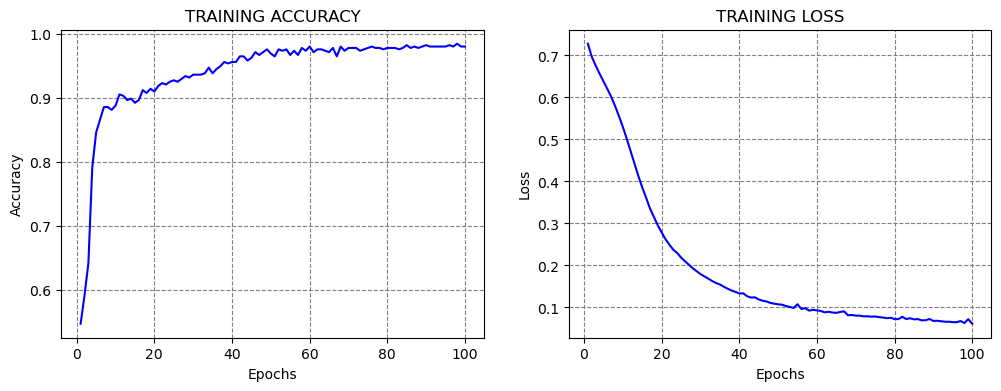

In [27]:
# plot the accuracy and loss
train_loss = history.history['loss']
acc = history.history['accuracy'] 

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show() 

### 14.2.2 Multiclass Classification <a id="14.2.2-multiclass-classification"/>

In this section, we will consider a multiclass classification problem. Our goal will be to train an ANN model for classifying the images in the Fashion MNIST dataset into 10 classes.

#### Loading the Dataset

Fashion MNIST dataset has 70,000 images, of which 60,000 are allocated for the training set and 10,000 for the test set. Examples of images in the dataset are shown in the next figure. Each is a grayscale image with 28 x 28 pixels. 

!['Fashion Dataset'](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

The images are classified into the following 10 categories: 

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

The dataset can be imported directly from Keras datasets.

In [28]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(fashion_train, fashion_train_label), (fashion_test, fashion_test_label) = fashion_mnist.load_data()

In [29]:
print('Training data inputs', fashion_train.shape)
print('Training labels', fashion_train_label.shape)
print('Testing data inputs', fashion_test.shape)
print('Testing labels', fashion_test_label.shape)

Training data inputs (60000, 28, 28)
Training labels (60000,)
Testing data inputs (10000, 28, 28)
Testing labels (10000,)


Let's check the shape of the training data and the values in the first image. 

In [30]:
# Shape of each sample
fashion_train[0].shape

(28, 28)

In [31]:
# Pixels in the first train image
fashion_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [32]:
# A list of label names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

This type of image is: Ankle boot(9)


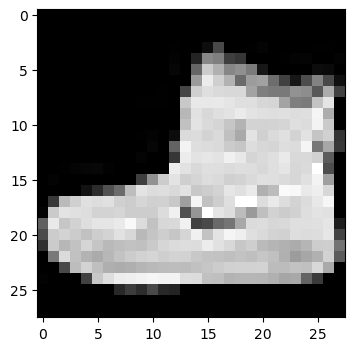

In [33]:
# Show the first image
index = 0
plt.figure(figsize=(4,4))
plt.imshow(fashion_train[index], cmap='gray')
# Display the label
image_label = fashion_train_label[index]
print('This type of image is: {}({})'.format(class_names[image_label], image_label))

We can also visualize several random images, to ensure that the labels match the images.

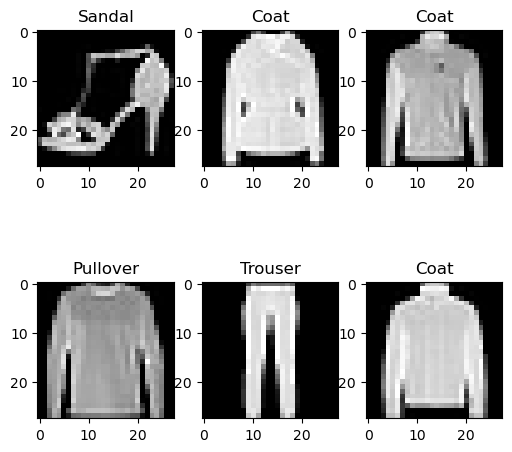

In [34]:
import random

plt.figure(figsize=(6,6))

for index in range(6):
    ax = plt.subplot(2, 3, index+1)
    random_index = random.choice(range(len(fashion_train)))
    plt.imshow(fashion_train[random_index], cmap='gray')
    plt.title(class_names[fashion_train_label[random_index]])

#### Data Preprocessing

As expected, the pixel values in the images range from 0 to 255. To scale the values to the range from 0 to 1, we can just divide the training and test sets by `255.0`. 

In [35]:
# Scaling the image pixels to be between 0 and 1
fashion_train = fashion_train/255.0
fashion_test = fashion_test/255.0

In addition, to create an ANN with fully-connected layers, we will need to reshape the images into one-dimensional arrays. Since each image has 28 x 28 = 784 pixels, let's use `reshape` to flatten the images. 

In the next lecture we will study Convolutional Neural Networks which are particularly suitable for processing image data, and they can work with 2-dimensional images without the need to flatten the arrays. 

In [36]:
fashion_train = fashion_train.reshape(-1, 784)

In [37]:
fashion_test = fashion_test.reshape(-1, 784)

In [38]:
# Check the shape
fashion_train.shape

(60000, 784)

#### Create the ANN 

In the next cell, we define the layers in the ANN. The architecture of the model is similar to the model we used in the previous example. Note that in the arguments for `Dense` layers we don't need to specify the `units` keyword, as the first positional argument is the number of units (neurons). 

Since this is a multiclass classification problem, notice that the number of neurons in the output layer is 10, as it needs to match the number of class labels in the dataset. Also, we need to use `softmax` activation in the output layer. 

In [39]:
# Define the layers in the network
inputs = Input(shape=(784,))
dense1 = Dense(64, activation='relu')(inputs)
dense2 = Dense(32, activation='relu')(dense1)
outputs = Dense(10, activation='softmax')(dense2)

In [40]:
fashion_classifier = Model(inputs, outputs)

#### Compile the ANN

To compile the model, we used the loss `sparse_categorical_crossentropy` because the labels are integers in ordinal encoding format. If the labels were in one-hot encoding format, we would have used `categorical_crossentropy` loss. 

In [41]:
# Compile the model
fashion_classifier.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

#### Train the ANN

To train the model, we pass the training data and labels. In this case, let's train the model for 10 epochs, and use a `batch_size` of 32 images. Also, we used the default verbose, and the training results are displayed at the end of each epoch. 

In [42]:
history = fashion_classifier.fit(fashion_train, fashion_train_label, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8172 - loss: 0.5174
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8616 - loss: 0.3883
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8711 - loss: 0.3526
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8831 - loss: 0.3253
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8870 - loss: 0.3096
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8910 - loss: 0.2953
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8944 - loss: 0.2843
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8988 - loss: 0.2749
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9020 - loss: 0.2640
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9043 - loss: 0.2581


#### Evaluate the ANN on Test Dataset

By using the `evaluate` method in Keras, we can see that the classification accuracy on test data is 88.4%.

In [43]:
# Evaluate on test dataset
evals_test = fashion_classifier.evaluate(fashion_test, fashion_test_label)
print("Classification Accuracy: ", evals_test[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8695 - loss: 0.3645   
Classification Accuracy:  0.8694999814033508


We can also use `predict()` to obtain the model's predictions.

In [44]:
predictions = fashion_classifier.predict(fashion_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step


In the next call, we checked the shape of the predicted outputs, and since there are 10,000 test images and 10 classes, the output is `(10000, 10)`. 

In [45]:
# check the shape of the predictions
predictions.shape

(10000, 10)

Also, we displayed the predictions for the first 5 test images in the next cell. For each image, the model outputs probabilities for each of the 10 classes. The probabilities sum to 1. For instance, for the first test image, the model assigned the highest probability to the class with index 9. 

In [46]:
# Display the predictions for the first 5 test images
np.around(predictions[:5],3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.063, 0.   ,
        0.936],
       [0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.269, 0.   , 0.038, 0.017, 0.001, 0.   , 0.673, 0.   , 0.002,
        0.   ]], dtype=float32)

To output the indices with the highest probability for each image we can use `np.argmax`. 

In [47]:
# Display the index with the highest probability for the first 5 test images
np.argmax(predictions[:5], axis=1)

array([9, 2, 1, 1, 6])

The ground-truth labels are also shown in the next cell, and they match correctly the predictions for the first 5 test images.

In [48]:
# print the ground-truth label for the first 5 test images
fashion_test_label[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

#### Visualize the Training Loss and Accuracy

The learning curves are shown in the figure below. It becomes obvious that if we train the model for longer than 10 epochs, we can improve the classification performance.

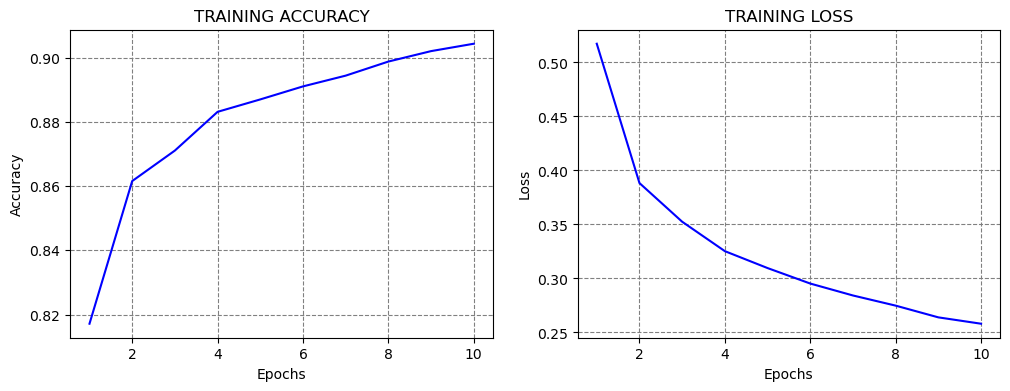

In [49]:
# plot the accuracy and loss
train_loss = history.history['loss']
acc = history.history['accuracy'] 

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show() 

#### Re-train and Evaluate the ANN

Note that if we re-train the same model on the same training data and evaluate it on the same testing data, in most cases we will obtain similar, but different values for the accuracy!!!

The reason for this is because every time a model is trained, the values of the network parameters are randomly initialized to small values close to 0 (but not 0 though). Because of the random initialization, the model will converge to a different solution every time we train it.

Consequently, ANNs have a stochastic nature, meaning that every time we train a model we obtain a different output. 

If the repeatability of the results is important, we can use a random seed to initialize the model parameters, and in that case, the accuracy will be the same if we re-train the model.  

In [50]:
fashion_classifier_2 = Model(inputs, outputs)

# Compile the model
fashion_classifier_2.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
fashion_classifier_2.fit(fashion_train, fashion_train_label, epochs=10, batch_size=32, verbose=0)

# Evaluate on test dataset
evals_test = fashion_classifier_2.evaluate(fashion_test, fashion_test_label)
print("Classification Accuracy: ", evals_test[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.8731 - loss: 0.3826
Classification Accuracy:  0.8730999827384949


## 14.3 Regression with ANNs <a id="14.3-regression-with-anns"/>

In regression tasks, we are interested in predicting single or multiple continuous values. The ANN architectures for regression tasks are similar to the architectures for classification tasks. The listed recommendations for the input and hidden layers are the same as for classification tasks. The number of neurons in the output layer depends on the problem. If we are predicting a single value it will be 1, and if we are predicting multiple values, the number of output neurons will be set to the number of predicted values. 

The choice of activation functions depends on the problem, but in most cases, `ReLU` will work well in the hidden layers. Unlike ANNs for classification, ANNs for regression don't need to have an activation function in the output layer, since the ANN outputs are continuous value(s).

We stated earlier that the loss function used in regression is usually `Mean Squared Error (MSE)`, or if the dataset contains outliers, `Mean Absolute Error (MAE)` loss may be preferred.

A suitable choice for an optimizer is Adam. Other optimizers to try include SGD, RMSProp, Nadam, and others. 

*Table: Typical values of hyperparameters in ANNs for regression*

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Neurons in input layer | Same as the number of input features |
| Number of hidden layer(s) | Depends on the problem, typically from 1 to 10 |
| Neurons per hidden layer | Depends on the problem, typically from 10 to 100 |
| Activation in hidden layers|  Mostly ReLU |
| Activation in output layer |None in most cases|
| Loss function | MSE or MAE |
| Optimizer | Mostly Adam, SGD, RMSProp |

Next, we will present an example of regression with ANNs, and for this purpose, we will use the California Housing Dataset that is available in scikit-learn. 

#### Loading the Dataset

We will load the California Housing Dataset from scikit-learn as a pandas DataFrame named `housing`. The objective of the regression task is to predict the median house value, shown in the column to the right. 

In [51]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True).frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [52]:
# Check the shape of the dataset
housing.shape

(20640, 9)

We can check if there are missing values, and visualize the histograms of the features.

In [53]:
housing.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

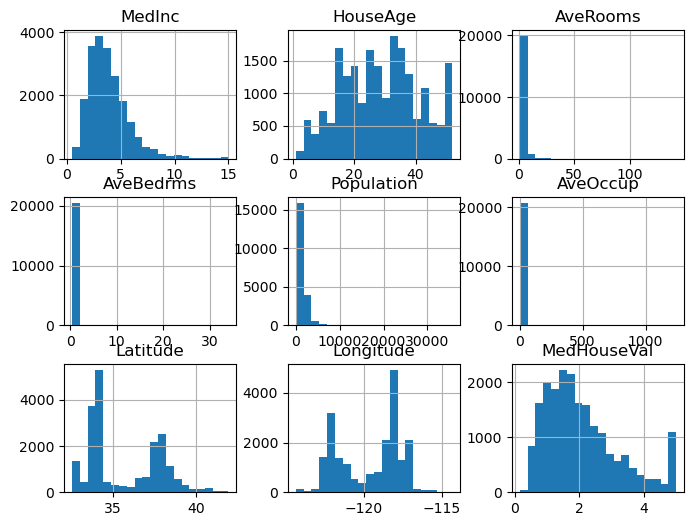

In [54]:
housing.hist(bins=20, figsize=(8,6))
plt.show()

In the next cell we will check if there are correlated features. We can notice high correlation between the house value and the number of bedrooms, which is expected. We can also notice high negative correlation between the price and longitude and latitude. In the following cell we plotted the house value versus longitude and latitude. The plot looks like the map of California, and we can see that houses that are closer to the coast are more expensive.

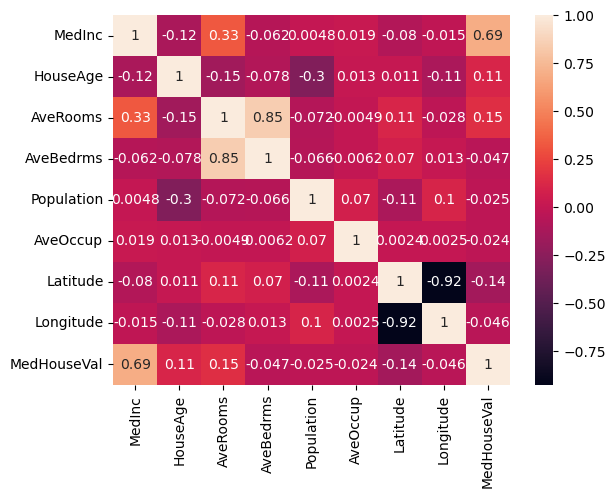

In [55]:
correlation = housing.corr()
sns.heatmap(correlation, annot=True);
# plt.show()

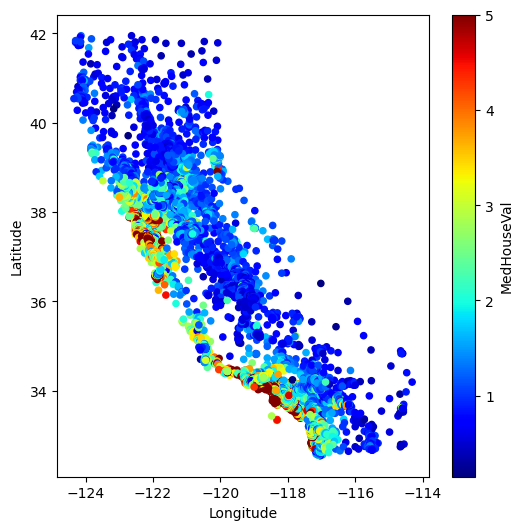

In [56]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", c="MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(6,6),);

And, if we check the median house value column, we can see that the values are in the range from 0 to 5.

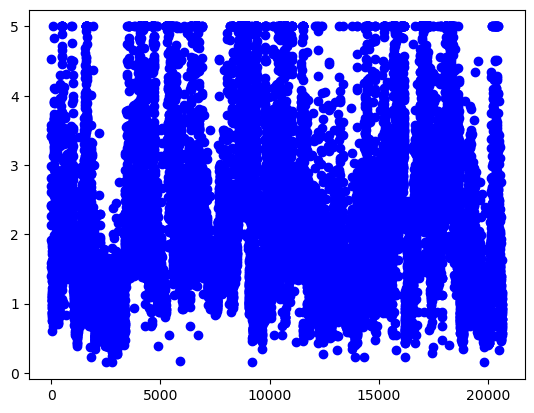

In [57]:
plt.plot(housing['MedHouseVal'], 'bo');

Let's get the features and the target values, and create training and testing datasets.

In [58]:
X = housing.drop('MedHouseVal', axis=1)
y = housing['MedHouseVal']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
print('Training data inputs', X_train.shape)
print('Training labels', y_train.shape)
print('Testing data inputs', X_test.shape)
print('Testing labels', y_test.shape)

Training data inputs (16512, 8)
Training labels (16512,)
Testing data inputs (4128, 8)
Testing labels (4128,)


In [61]:
# Scaling the features to be between 0 and 1
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Create the ANN

Let's use a similar ANN architecture as in the classification tasks, with two Dense layers with ReLU activations, having 32 neurons each. 

Since we would like to predict a single value, we will use 1 neuron in the output layer, without activation function.

In [62]:
# Define the layers in the network
inputs = Input(shape=(8,))
dense1 = Dense(32, activation='relu')(inputs)
dense2 = Dense(32, activation='relu')(dense1)
outputs = Dense(1)(dense2)

In [63]:
# Define the model by providing the inputs and outputs
model_2 = Model(inputs, outputs)

We can inspect the architecture of the ANN with the `summary()` method. 

In [64]:
model_2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,377 (5.38 KB)

 Trainable params: 1,377 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile the ANN

In this case, we will use `mean_squared_error` loss function. During training, the loss function will calculate the squared difference between the target value $y$ and the predicted value $\hat{y}$, calculated as $\sum{(y - \hat{y})^2}$.  

We can use the Adam optimizer for regression tasks as well. Note that we cannot measure accuracy as in classification tasks, therefore we don't need to specify a performance metric. Alternatively, we can use mean-squared error, mean-absolute error, or R2 score as metrics. 

In [65]:
# Compile the model
model_2.compile(loss='mean_squared_error', optimizer='adam')

#### Train the ANN

Similarly to classification tasks, to fit the model we will provide the training data and the target values. Let's fit the model for 200 epochs. 

In [66]:
history = model_2.fit(X_train_scaled, y_train, epochs=200, verbose=0)

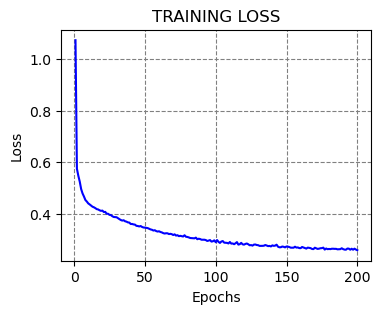

In [67]:
# plot the loss
train_loss = history.history['loss']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(4, 3))

plt.plot(epochsn,train_loss, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show() 

#### Evaluate the ANN

We will again use `predict` to obtain the outputs of the model. Let's check the predicted values for the first 10 test samples. 

In [68]:
predictions = model_2.predict(X_test_scaled[:10])
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.50592124],
       [0.7766473 ],
       [5.044109  ],
       [2.6232712 ],
       [2.767562  ],
       [1.7727039 ],
       [2.3566236 ],
       [1.7581401 ],
       [2.9044712 ],
       [4.960486  ]], dtype=float32)

And we can compare the predicted values by the model to the target ground-truth values. It would be easier to create a plot of the predicted and target values, as in the following cell. We can see that for most values, the model predictions are close to the target values. 

In [69]:
# Ground-truth values
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

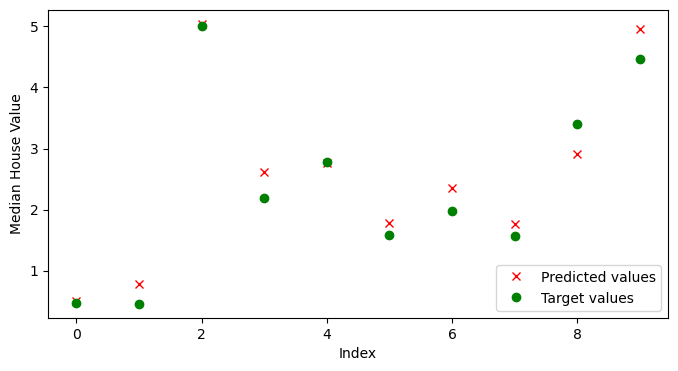

In [70]:
plt. figure(figsize=(8, 4))
plt.plot(predictions, 'rx', label='Predicted values')
plt.plot(np.array(y_test[:10]), 'go', label='Target values')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Median House Value')
plt.show()

As we mentioned, metrics that we can use to evaluate the performance of regression models include mean-squared error (MSE), mean-absolute error (MAE),  or R-squared score. R-squared score (or $R^2$) is also called coefficient of determination, and evaluates the goodness of fit of regression models, by measuring the proportion of the variation in the target variable that is contained in the predicted variable.

In the next cell we imported these metrics from scikit-learn and calculated their values. Note that for MSE and MAE lower values indicate better performance, and for R2 score greater values indicate better performance. 

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

all_preds = model_2.predict(X_test_scaled)

print(f'MSE: {mean_squared_error(y_test, all_preds):7.4f}')
print(f'MAE: {mean_absolute_error(y_test, all_preds):7.4f}')
print(f'R2 score: {r2_score(y_test, all_preds):7.4f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step
MSE:  0.2939
MAE:  0.3815
R2 score:  0.7757


## 14.4 Saving and Loading Models in Keras <a id="14.4-saving-and-loading-models-in-keras"/>

To save a model in Keras, we simply use the `save()` method, and provide the path to the directory. 

The saved model contains the architecture with the layers, the weights for all layers in the model, and other information related to the used optimizer, loss, and metrics. 

There are two possible formats to save the models into: **HDF5** and **Keras-TensorFlow SavedModel**. If we provide the `.h5` extension, then the saved model format is HDF5. If we provide the `.keras` extension, or if we don't provide any extension, the model will be saved into Keras-TensorFlow SavedModel format. 

Keras-TensorFlow SavedModel is the default, and it is recommended, since it is a newer format, and it saves additional information that is not included in the `h5` file, such as losses and metrics (e.g., they can be useful if we wish to resume training).

Let's use the Keras-TensorFlow SavedModel format to save the first classification model `model_1` from Section 14.2.1 in the current working directory under the name `classification_model`.

In [72]:
# Saving a model
model_1.save('classification_model.keras')

To load a saved model we will use the `load_model` method. It returns the architecture and weights of the saved model. 

Let's load the save model as `model_3`.

In [73]:
# Loading a saved model
from tensorflow.keras.models import load_model

model_3 = load_model('classification_model.keras')

Afterward, we can use the loaded model as we would use any other model.

Let's evaluate the model on the test dataset, just to check whether the returned value would be as expected.

In [74]:
# Evaluate on test dataset
evals_test = model_3.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9737 - loss: 0.0904  
Classification Accuracy:  0.9736841917037964


The summary of the model is displayed below.

In [75]:
model_3.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,235 (16.55 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,824 (11.04 KB)

## Appendix <a id="appendix"/>

**The material in the Appendix is not required for quizzes and assignments.**

### Keras-TensorFlow Model APIs

In Keras-TensorFlow, there are three ways to build ANNs:

- Functional API
- Sequential API
- Subclassing API

#### Functional API in Keras

In the above examples, we used Functional API to build our models. Repeated again in the next cell is the first model example for classification which we used in Section 14.2.1.

In [76]:
# Define the layers in the network
inputs = Input(shape=(30,))
dense1 = Dense(units=30, activation='relu')(inputs)     
dense2 = Dense(units=15, activation='relu')(dense1)
outputs = Dense(units=1, activation='sigmoid')(dense2)

# Define the model by providing the inputs and outputs
model_1 = Model(inputs, outputs)

Functional API is the recommended API, because it is a more recent and advanced API in comparison to Sequential API, but it is simpler than the Subclassing API.

Functional API allows to build models with multiple inputs and outputs, or with custom connections between the hidden layers (examples are residual or skip connections, which we will study in the following lectures). Because of these characteristics, Functional API is well suited for creating networks for advanced tasks, such as object detection, segmentation, and others.

#### Sequential API in Keras

Sequential API is the initial option in Keras for model building, as well as it is the simplest. 

The corresponding sequential model to the above `model_1` is shown in the next cell. To create the model, we just add the layers in a sequence, one after another. 

In [77]:
from tensorflow.keras.models import Sequential

# Define the model and the layers in the network
model_1_seq = Sequential([
        Dense(30, activation='relu'),
        Dense(15, activation='relu'),
        Dense(1, activation='sigmoid')])

After the model is created, the steps of compiling, training, and evaluation are the same, as shown in the next cell. As we explained above, the reason that the accuracy of `model_1_seq` is different than the accuracy of `model_1` is not because of the API used, but because of the stochastic nature of ANNs. 

In [78]:
# Compile the model
model_1_seq.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the model
model_1_seq.fit(train_data, train_labels, epochs=100, batch_size=64, verbose=0)

# Evaluate on test dataset
evals_test_seq = model_1_seq.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test_seq[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9737 - loss: 0.0931 
Classification Accuracy:  0.9736841917037964


Sequential API is suitable for simple classification or regression tasks. However, this API is not suited for tasks with multiple inputs or outputs, or for networks with advanced architectures. 

### Subclassing API in Keras

Subclassing API is designed for building custom models and having full control of every step in the model building and training. It is the most suitable for building models with complex or custom architectures. 

In [79]:
# # Define the layers in the network
class Model1Subclass(Model):

    def __init__(self, **kwargs):
        super().__init__()
        self.dense_1 = Dense(30, activation='relu')
        self.dense_2 = Dense(15, activation='relu')
        self.dense_3 = Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.dense_1(inputs)
        x = self.dense_2(x)
        x = self.dense_3(x)
        return x

# Instantiate the model
model_1_subclass = Model1Subclass()

In [80]:
# Compile the model
model_1_subclass.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the model
model_1_subclass.fit(train_data, train_labels, epochs=100, batch_size=64, verbose=0)

# Evaluate on test dataset
evals_test_subclass = model_1_subclass.evaluate(test_data, test_labels)
print("Classification Accuracy: ", evals_test_subclass[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9737 - loss: 0.0865 
Classification Accuracy:  0.9736841917037964


The Subclassing API in Keras is also similar to the model building in PyTorch. We will learn about PyTorch in an upcoming lecture.

## References <a id="references"/>

1. Complete Machine Learning Package, Jean de Dieu Nyandwi, available at: [https://github.com/Nyandwi/machine_learning_complete](https://github.com/Nyandwi/machine_learning_complete).
2. Implementing Linear Regression on California Housing Dataset, Debarshi Raj Basumatary, available at: [https://medium.com/mlearning-ai/implementing-linear-regression-on-california-housing-dataset-378e14e421b7](https://medium.com/mlearning-ai/implementing-linear-regression-on-california-housing-dataset-378e14e421b7). 
3. The Difference Between Deep Learning Training and Inference, Mark Robins, available at: [https://www.linkedin.com/pulse/difference-between-deep-learning-training-inference-mark-robins-mdq8c/](https://www.linkedin.com/pulse/difference-between-deep-learning-training-inference-mark-robins-mdq8c/).

[BACK TO TOP](#top)